# Stock price Prediction using LSTM

## 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
%matplotlib notebook

In [ ]:
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Loading our Dataset

In [ ]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL',data_source='yahoo', start=start, end=end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221153
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616684
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139954


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


## 3. Dropping columns

In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
0,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
4,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096
...,...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2512,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221153
2513,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2514,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616684


In [ ]:
plt.plot(df.Close,c='orange')
plt.show()

<IPython.core.display.Javascript object>

### 4. Calculating and plotting Moving Average of 100 and 200 days

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

In [ ]:
plt.plot(df.Close)
plt.plot(ma100)
plt.show()

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

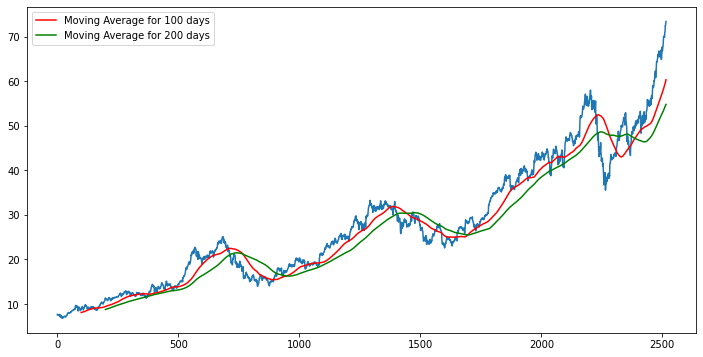

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='Moving Average for 100 days')
plt.plot(ma200,'g',label='Moving Average for 200 days')
plt.legend()
plt.show()

In [ ]:
df.shape

(2516, 5)

## 5. Splitting and Scaling the date

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1761, 1)
(755, 1)


In [ ]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_test.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1661, 100, 1)

## 6. LSTM Model

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
              input_shape = (x_train.shape[1],1)))  # If we work with open,and other factors we can include other factors as well
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation='relu',return_sequences=True,
              ))  
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation='relu',return_sequences=True,
              ))  
model.add(Dropout(0.4))


model.add(LSTM(units = 120,activation='relu'))  
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=50)
#batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
52/52 [==============================] - 22s 268ms/step - loss: 0.0138 - mae: 0.0881
Epoch 2/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0110 - mae: 0.0776
Epoch 3/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0091 - mae: 0.0702
Epoch 4/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0077 - mae: 0.0650
Epoch 5/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0076 - mae: 0.0644
Epoch 6/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0073 - mae: 0.0626
Epoch 7/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0068 - mae: 0.0609
Epoch 8/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0069 - mae: 0.0610
Epoch 9/50
52/52 [==============================] - 14s 272ms/step - loss: 0.0063 - mae: 0.0586
Epoch 10/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0063 - mae: 0.0579
Epoch 11/50
52/52 [====================

In [ ]:
model.save('keras_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_test.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
past_100_days = data_train.tail(100)

In [ ]:
past_100_days.shape

(100, 1)

In [ ]:
data_train.tail(100)

,Close
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
1665,27.370001
...,...
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [ ]:
final_df = past_100_days.append(data_test,ignore_index=True)

In [ ]:
final_df.shape

(855, 1)

In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [ ]:
x_test.shape

(755, 100, 1)

In [ ]:
y_test.shape

(755,)

## 8. Making predictions

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [ ]:
y_predicted

array([[0.13833867],
       [0.13907811],
       [0.1396495 ],
       [0.14003092],
       [0.14021963],
       [0.14025065],
       [0.14018983],
       [0.14010704],
       [0.14007041],
       [0.14012308],
       [0.14027858],
       [0.14054877],
       [0.1409362 ],
       [0.14142907],
       [0.14200887],
       [0.14265259],
       [0.1433317 ],
       [0.1440464 ],
       [0.14480297],
       [0.14560358],
       [0.146438  ],
       [0.14728391],
       [0.14823347],
       [0.14938992],
       [0.15069902],
       [0.15223677],
       [0.15406622],
       [0.15622878],
       [0.1587408 ],
       [0.16156456],
       [0.16465718],
       [0.16797909],
       [0.1714862 ],
       [0.17510164],
       [0.17875004],
       [0.18237244],
       [0.18592182],
       [0.18934992],
       [0.19261177],
       [0.19567148],
       [0.19850275],
       [0.20111632],
       [0.20352583],
       [0.20575337],
       [0.20781553],
       [0.20972602],
       [0.21148884],
       [0.213

In [ ]:
scaler.scale_

array([0.02099517])

In [ ]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

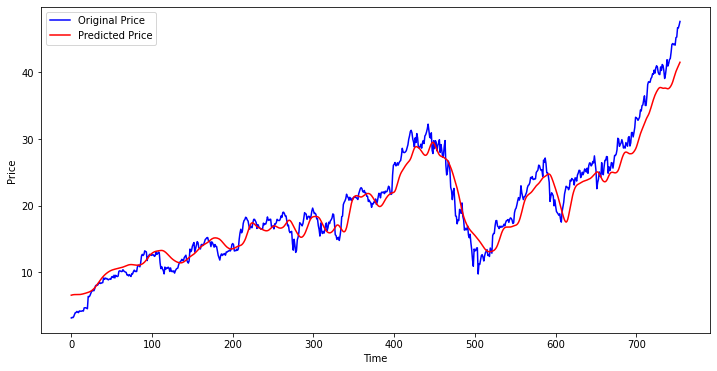

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## 9. Calculating Accuracy and Loss

In [ ]:
mae = history.history['mae'][-1]

In [ ]:
mae

0.04114987328648567

In [ ]:
mse=history.history['loss'][-1]

In [ ]:
mse

0.0029522196855396032

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test,y_predicted)
mse

4.5714211071909014

In [ ]:
r2 = r2_score(y_test,y_predicted)

In [ ]:
r2

0.9384701702739939

In [ ]:
mae = mean_absolute_error(y_test,y_predicted)

In [ ]:
mae

1.7007791144950342